<a href="https://colab.research.google.com/github/Ighus/ds_analisys_amazon_bestbuy_eletronics/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index de colunas:

asins: 

brand: The brand name of this product.
Field type: text

categories: A list of category keywords used for this product across multiple sources.
Field type: text

|Coluna  |Descição  |
|---|---|
|asins|The ASIN (Amazon identifier) used for this product.|
|brand |The brand name of this product. |
|categories |A list of category keywords used for this product across multiple sources. |
|colors |A list of colors available for this product. |
|count |The number of units included in the product packaging. Can include a description of the unit. |
|dateAdded |The date this product was first added to the product database. |
|dateUpdated |The most recent date this product was updated or seen by our system. |
|descriptions | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |


In [1]:
import os
import zipfile

# Download do dataset
!gdown --id 18ED_53r5Psnn-CU-gfrXGji2Qp-dTqdR

# Extrator de arquivos
zip_ref = zipfile.ZipFile('./amazon-and-best-buy-electronics.zip', 'r')
zip_ref.extractall()
zip_ref.close()

folder_path_base = './amazon-and-best-buy-electronics'

Downloading...
From: https://drive.google.com/uc?id=18ED_53r5Psnn-CU-gfrXGji2Qp-dTqdR
To: /content/amazon-and-best-buy-electronics.zip
100% 3.77M/3.77M [00:00<00:00, 15.8MB/s]


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)
# pd.reset_option('max_columns')

In [3]:
data = pd.read_csv(f'{folder_path_base}/data/datafinitielectronicsproductdata.csv')

In [4]:
data['reviews_text'].iloc[0]

'This keyboard is very easy to type on, but the fingerprint reader is the best feature. It is very accurate and simplifies login.'

In [5]:
data.shape

(7299, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateadded            7299 non-null   object 
 6   dateupdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageurls            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturernumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primarycategories    7299 non-null   object 
 15  reviews_date         7238 non-null   o

In [7]:
data.head()

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,NaN,890000000000,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,NaN,890000000000,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,NaN,890000000000,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,NaN,890000000000,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,NaN,890000000000,1.1 pounds


In [8]:
data.describe()

,ean,reviews_numhelpful,reviews_rating,upc
count,2.951000e+03,5813.000000,7135.000000,7.299000e+03
mean,2.986492e+11,0.746774,4.371969,3.866713e+11
std,3.385510e+11,3.420246,1.038561,3.681693e+11
min,2.710811e+10,0.000000,1.000000,1.781766e+10
25%,9.785510e+10,0.000000,4.000000,5.003633e+10
50%,9.785510e+10,0.000000,5.000000,9.785510e+10
75%,6.490000e+11,0.000000,5.000000,7.930000e+11
max,8.900000e+11,128.000000,5.000000,8.900000e+11


In [9]:
# data.iloc[:,:5].describe(include='O')
data.describe(include='O')

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,weight
count,7299,7299,7299,7299,5280,7299,7299,6090,7299,7299,4632,7299,7299,7299,7238,7299,5908,7299,7294,7295,7299,6118,7299
unique,50,50,38,49,17,50,47,34,50,50,23,50,50,1,1605,911,2,2302,7205,5535,6493,45,49
top,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,2.2 x 1.2 x 7.3 inches,https://images-na.ssl-images-amazon.com/images...,"logitech/915000224,logitech915000224harmonyult...",Logitech,915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,Electronics,2017-07-19T00:00:00Z,"2017-09-08T00:00:00Z,2017-08-31T00:00:00Z,2017...",True,https://www.amazon.com/product-reviews/B00IAKL...,Using this with a Sony BD player and Onkyo 5.1...,Five Stars,ByAmazon Customer,https://www.amazon.com/Logitech-Ultimate-15-De...,1.7 pounds
freq,1604,1604,1692,1604,2920,1604,1604,1604,1604,1604,1604,1604,1604,7299,55,800,5401,585,7,135,63,1604,1604


In [10]:
data.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateadded                 0
dateupdated               0
dimension              1209
ean                    4348
imageurls                 0
keys                      0
manufacturer           2667
manufacturernumber        0
name                      0
primarycategories         0
reviews_date             61
reviews_dateseen          0
reviews_dorecommend    1391
reviews_numhelpful     1486
reviews_rating          164
reviews_sourceurls        0
reviews_text              5
reviews_title             4
reviews_username          0
sourceurls             1181
upc                       0
weight                    0
dtype: int64

#### Existem 49 produtos unicos

In [11]:
len(data['categories'].unique())

49

In [13]:
sorted(data['reviews_rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

#### Verificando a média global das avaliações que estão preenchidas

In [12]:
microsoft_data = data.loc[data['brand'] == 'Microsoft', :]
ratings = list(microsoft_data['reviews_rating'].dropna())
print('Média de avaliações para a Microsoft é : ', sum(ratings)/len(ratings))

Média de avaliações para a Microsoft é :  4.606060606060606


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


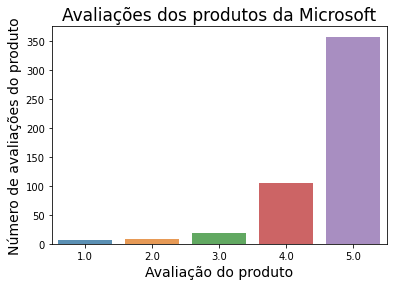

In [14]:
top = microsoft_data['reviews_rating'].value_counts().index.tolist()
value = microsoft_data['reviews_rating'].value_counts().values.tolist()
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Avaliação do produto', fontsize=14)
plt.ylabel('Número de avaliações do produto', fontsize=14)
plt.title('Avaliações dos produtos da Microsoft', fontsize=17);

#### Verificando alguns titulos que os avaliadores colocam em seus comentários

In [15]:
data['reviews_title'].unique()[:5]

array(['Love the fingerprint reader', 'Nice', 'New', 'Nice keyboard',
       'Nice improvement'], dtype=object)

#### Verificação de qual a média do número de palavras escritas nas reviews

In [16]:
# data_aux = data.loc[data['reviews_rating'].dropna()]
total_reviews = list(data['reviews_text'])
length = []
for i in range(0, len(total_reviews)):
    total_reviews[i] = str(total_reviews[i])
    a = len(total_reviews[i].split(' '))
    length.append(a)
    
print('A média de palavras nas reviews é: ', sum(length)/len(length))

A média de palavras nas reviews é:  53.43019591724894


Criando coluna de descição para as notas dos produtos entre bom e ruim

In [26]:
good_rate = len(data[data['reviews_rating'] >= 3])
bad_rate = len(data[data['reviews_rating'] < 3])

print ('Reviews positivos: {} reviews para produtos no geral'.format(good_rate))
print ('Reviews negativos: {} reviews para produtos no geral'.format(bad_rate))

data['rating_class'] = data['reviews_rating'].apply(lambda x: 'bad' if x < 3 else'good')
data.head()

Reviews positivos: 6595 reviews para produtos no geral
Reviews negativos: 540 reviews para produtos no geral


,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,upc,weight,rating_class
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,NaN,890000000000,1.1 pounds,good
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,NaN,890000000000,1.1 pounds,good
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,NaN,890000000000,1.1 pounds,good
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,NaN,890000000000,1.1 pounds,good
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,NaN,890000000000,1.1 pounds,good


In [35]:
data[data.duplicated(['reviews_username', 'asins', 'reviews_date'], keep = False)]

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,upc,weight,rating_class
156,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2016-03-19T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Great keyboard nicely spaced keys, good feel ...",The fingerprint scanner is worth the extra $$,LLORCA331,NaN,890000000000,1.1 pounds,good
415,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2016-03-19T00:00:00Z,"2017-08-27T00:00:00Z,2017-05-06T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Great keyboard – nicely spaced keys, good feel...",The fingerprint scanner is worth the extra $$,LLORCA331,NaN,890000000000,1.1 pounds,good
498,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-10-28T00:00:00Z,2016-04-16T00:00:00Z,NaN,NaN,NaN,http://www.amazon.com/Microsoft-Surface-Cover-...,This type cover is a nice upgrade over the one...,This type cover is a nice upgrade over the one...,Quentin Lawrence,NaN,890000000000,1.1 pounds,good
501,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-10-29T00:00:00Z,2016-04-06T00:00:00Z,NaN,NaN,NaN,http://www.amazon.com/Microsoft-Surface-Cover-...,I've had this keyboard case for a day. I figur...,"Almost perfect on day 2, with minor bugs 8 peo...",Reviewer101,NaN,890000000000,1.1 pounds,good
502,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,NaN,2016-01-17T00:00:00Z,NaN,NaN,NaN,http://www.amazon.com/Microsoft-Surface-Cover-...,"Without the fanboy title, I am a huge Microsof...",Microsoft Has Nearly Perfected The Type Cover,Brian A. Wolters,NaN,890000000000,1.1 pounds,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,2.2 x 1.2 x 7.3 inches,9.785510e+10,https://images-na.ssl-images-amazon.com/images...,"logitech/915000224,logitech915000224harmonyult...",Logitech,915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,Electronics,2015-12-16T00:00:00Z,"2017-08-31T00:00:00Z,2017-09-08T00:00:00Z,

In [20]:
|data.reviews_numhelpful.unique()

array([  0.,   2.,   4.,   3.,   8.,  12.,   1.,  nan,  45.,  27.,   6.,
         7.,   9.,  14.,  15.,   5.,  11.,  20.,  21.,  34.,  44.,  37.,
       128.,  10.,  23.,  31.,  16.,  13.,  96.,  36.,  18.,  25.,  47.,
        24.,  17.,  19.,  35.,  33.,  29.,  22.])